### Linear Models for Classification. 
Linears Models are also extensively used for classification. Let's Look at binary classification first. 
In this cace, a prediction is made using the following formula:

y_pred = w[0] * x[0] + w[1] * x[1] + .... + w[p] * x[p] + b > 0

The formula looks very similar to the one for linar regression, but instead of just returning the weighted sum of features, we threshold the predicted values at zero. If the function is smaller than zero, we predict the class `-1` ; If it is larger than zero, we predict the class `+1`;. This prediction rule is common to all linar models for classification.   

For linear models for regression, the output y_pred is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that seperats 2 classes using a line, a plane, or a hyperplane. There are many algorithms for learning linear models. These algorithms all differ in the following 2 ways :

- The way in which they measure how well a particular combination of coefficients and intercept fit the training data. 

- If and what kind of rgularization they use.

The most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegrssion and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is actually a classification algorithm, not a regression one.

### Here's Copilot's take on Logistic Regression.

Logistic Regression in `scikit-learn` is implemented using the `LogisticRegression` class from the `sklearn.linear_model` module. Here's a detailed explanation:

### Overview
Logistic Regression is a statistical method for predicting binary outcomes. It estimates the probability that a given input point belongs to a certain class. The algorithm uses the logistic function (also known as the sigmoid function) to model a binary dependent variable.

### Key Features
- **Binary and Multiclass Classification**: While primarily used for binary classification, logistic regression can also handle multiclass classification problems using strategies like one-vs-rest (OvR) or multinomial logistic regression.
- **Regularization**: Supports L1, L2, and Elastic-Net regularization to prevent overfitting.
- **Solvers**: Multiple optimization algorithms are available, including 'liblinear', 'newton-cg', 'sag', 'saga', and 'lbfgs'. The choice of solver can affect performance and compatibility with different types of regularization¹.

### Basic Usage
Here's a simple example of how to use logistic regression with `scikit-learn`:

1. **Import the necessary module:**
   ```python
   from sklearn.linear_model import LogisticRegression
   ```

2. **Create an instance of the classifier:**
   ```python
   model = LogisticRegression()
   ```

3. **Fit the model using your training data:**
   ```python
   # Assuming X_train contains your features and y_train contains your labels
   model.fit(X_train, y_train)
   ```

4. **Make predictions:**
   ```python
   # Assuming X_test contains your test features
   predictions = model.predict(X_test)
   ```

### Example Code
Here's a complete example:
```python
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print predictions
print(predictions)
```

### Parameters
- **penalty**: Specifies the norm of the penalty ('l1', 'l2', 'elasticnet', or None).
- **dual**: Dual or primal formulation.
- **tol**: Tolerance for stopping criteria.
- **C**: Inverse of regularization strength.
- **fit_intercept**: Specifies if a constant should be added to the decision function.
- **solver**: Algorithm to use in the optimization problem.
- **max_iter**: Maximum number of iterations taken for the solvers to converge¹.

For more detailed information, you can refer to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)¹.



Let's try it out using the Scikit-Learn breast canser dataset. 

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split

In [2]:
breast_canser = pd.read_csv(filepath_or_buffer = '../datasets/sklearn_breast_canser_ds.csv')
breast_canser.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.192100,0.096640,0.1902,0.06220,...,35.90,159.80,1724.0,0.17820,0.38410,0.575400,0.18720,0.3258,0.09720,0
1,13.77,22.29,90.63,588.9,0.12000,0.12670,0.138500,0.065260,0.1834,0.06877,...,34.01,111.60,806.9,0.17370,0.31220,0.380900,0.16730,0.3080,0.09333,0
2,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.170000,0.23560,0.4089,0.14090,0
3,12.80,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.040830,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.18120,0.190100,0.08296,0.1988,0.07053,1
4,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.10210,0.06191,0.001845,0.01111,0.2439,0.06289,1


In [3]:
breast_canser = breast_canser.select_dtypes(exclude = 'object')
y = breast_canser['target']
X = breast_canser.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

<Axes: xlabel='target'>

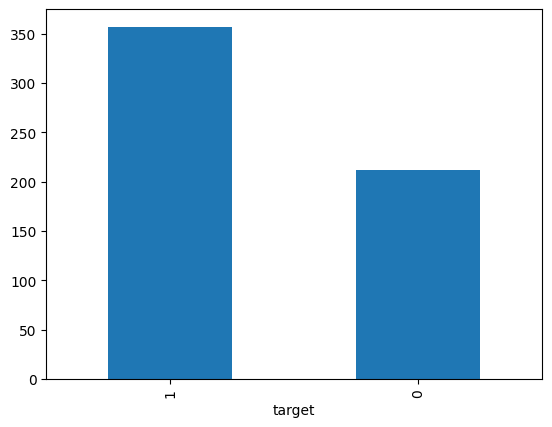

In [4]:
# Let's check the distribution of the target. 
y.value_counts().plot(kind = 'bar')

Let's train a LogisticRegression model.

In [5]:
MAX_ITER = 100_000
lor_model = LogisticRegression(max_iter = MAX_ITER).fit(X_train, y_train) 

In [6]:
# Let's score the model. 
print("LogisticRegression Model's Accuracy Metrics")
print(f'Training Set Mean Accuracy  : {lor_model.score(X_train, y_train):.2f}')
print(f'Test Set Accuracy : {lor_model.score(X_test, y_test):.2f}')

LogisticRegression Model's Accuracy Metrics
Training Set Mean Accuracy  : 0.96
Test Set Accuracy : 0.93


Let's train a linear SVC 

MAX_ITER_1 = 10_000_000 </br>
svc_model = LinearSVC(max_iter = MAX_ITER_1).fit(X_train, y_train) </br>
The support vector classifier did not converge for max_iter <= 10,000,000 </br> so i just stopped. 


### Let's use the forge dataset from mglearn

In [7]:
import mglearn
import matplotlib.pyplot as plt

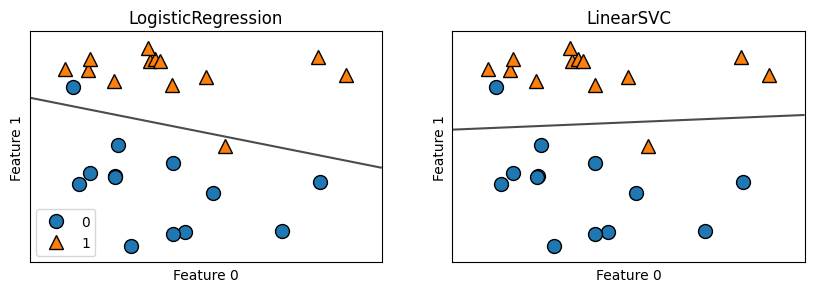

In [8]:
import mglearn.datasets


X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10,3))

for model, ax in zip([LogisticRegression, LinearSVC], axes):
    clf = model().fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
                                    ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel(f'Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()    



### Let's analyze LogisticRegression on the breast canser dataset. 


In [32]:
breast_canser = pd.read_csv(filepath_or_buffer = '../datasets/sklearn_breast_canser_ds.csv')
y = breast_canser['target']
X = breast_canser.drop(axis = 1, columns = 'target')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
logreg = LogisticRegression(max_iter = MAX_ITER).fit(X_train, y_train)
print(f'Training set score : {logreg.score(X_train, y_train):.3f}')
print(f'Test set score : {logreg.score(X_test, y_test):.3f}')

Training set score : 0.965
Test set score : 0.930


The default value of C=1 provides quite good performance, with 96% accuracy on the training  set and a 93% accuracy on the test set at max_iter set to 100K. But as training and test set performance are very close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible
mode

In [33]:
logreg100 = LogisticRegression(max_iter = MAX_ITER, C = 100).fit(X_train, y_train)
print(f'Training set score for C = 100 : {logreg100.score(X_train, y_train):.3f}')
print(f'Test set score for C = 100 : {logreg100.score(X_test, y_test):.3f}')

Training set score for C = 100 : 0.979
Test set score for C = 100 : 0.944


At C = 100, The train and test set scores increased, confirming that at C = 1, the model is indeed underfitting. Let's add more regularization by decreasing the value of C. 

In [36]:
logreg0_001 = LogisticRegression(max_iter = MAX_ITER, C = 0.001).fit(X_train, y_train)
print(f'Training set score for C = 0.001 : {logreg0_001.score(X_train, y_train):.3f}')
print(f'Test set score for C = 0.001 : {logreg0_001.score(X_test, y_test):.3f}')

Training set score for C = 0.001 : 0.948
Test set score for C = 0.001 : 0.930


At C = 0.01, the training set's accuracy fell, while the test set's accuracy remained  around the same. SO this underfits worse than the first one.

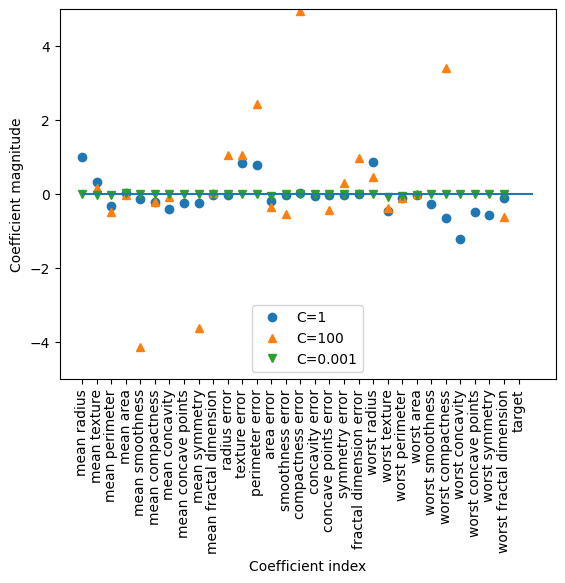

In [37]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg0_001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(breast_canser.shape[1]), breast_canser.columns, rotation=90)
plt.hlines(0, 0, breast_canser.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()


Coefficients learned by logistic regression on the Breast Cancer Dataset for different values of C ☝

If we desire a more interpretable model, using L1 regularization might help since it outright places some features as zero.
Here's a coefficient plot and classification accuracies for L1 regularization.

Training accuracy of l1 logreg with C = 0.001: 0.95
Test accuracy of l1 logreg with C = 0.001: 0.93
Training accuracy of l1 logreg with C = 1.000: 0.96
Test accuracy of l1 logreg with C = 1.000: 0.93
Training accuracy of l1 logreg with C = 100.000: 0.98
Test accuracy of l1 logreg with C = 100.000: 0.94


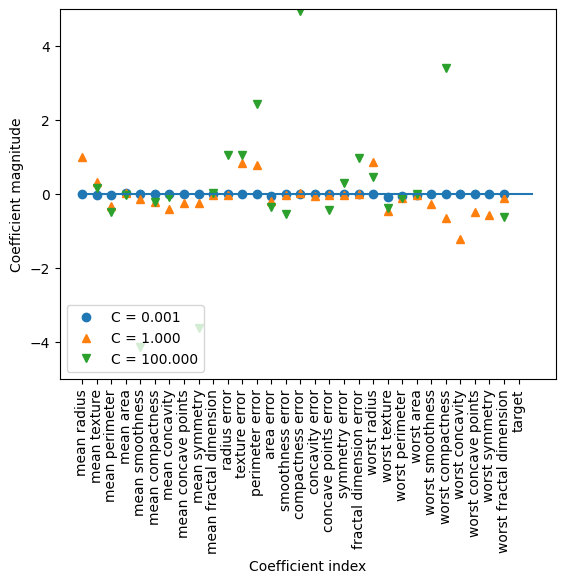

In [44]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C = C, penalty = "l2", max_iter = MAX_ITER).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C = {:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C = {:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C = {:.3f}".format(C))

plt.xticks(range(breast_canser.shape[1]), breast_canser.columns, rotation=90)
plt.hlines(0, 0, breast_canser.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)   

The l1 regularized model performed better with greater values of C. 